In [1]:
from house_price_MLP import HousePriceModel
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
cityname = 'TPE'
data=pd.read_csv(f'../03.dataset/{cityname}_model_features_clean.csv')
data_class = pd.get_dummies(data['鄉鎮市區'])
data_class.columns = ['鄉鎮市區_' + str(x) for x in data_class.columns]
data = pd.concat([data, data_class], axis = 1)
data.insert(data.shape[1], 'y', data['單價元平方公尺'])
data.drop(['單價元平方公尺', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2', 
        '鄉鎮市區', 'geometry'],axis=1,inplace=True)
data = data.loc[:, data.std() > 0]
data = data.dropna()


# 訓練集 & 測試集
train_data =  data.loc[data['交易年份'] < 111]
        
# 資料標準化
mean = train_data.mean()
std = train_data.std()
train_data = (train_data-mean)/std

In [3]:
medical_facilities_min = (train_data['NEAR_HOSTIPAL_750'] + train_data['CLINIC_COUNT_750'] + train_data['DENTIST_COUNT_750'] + train_data['PHARMACY_COUNT_750']).min()
medical_facilities_max = (train_data['NEAR_HOSTIPAL_750'] + train_data['CLINIC_COUNT_750'] + train_data['DENTIST_COUNT_750'] + train_data['PHARMACY_COUNT_750']).max()
print(f'min:{medical_facilities_min}, max:{medical_facilities_max}')

min:-4.9894495152392455, max:15.283536526137816


In [4]:
economic_indicators_min = (train_data['CSTORE_COUNT_750'] + train_data['FASTFOOD_COUNT_750']).min()
economic_indicators_max = (train_data['CSTORE_COUNT_750'] + train_data['FASTFOOD_COUNT_750']).max()
print(f'min:{economic_indicators_min}, max:{economic_indicators_max}')

min:-2.767560780844089, max:7.358466566699157


In [5]:
educational_resources_min = (train_data['LIBRARY_COUNT_750']+train_data['NEAR_SCHOOL_750']+train_data['NEAR_UNIVERSITY_750']).min()
educational_resources_max = (train_data['LIBRARY_COUNT_750']+train_data['NEAR_SCHOOL_750']+train_data['NEAR_UNIVERSITY_750']).max()
print(f'min:{educational_resources_min}, max:{educational_resources_max}')

min:-10.832623339311857, max:7.462537751467261


In [6]:
public_safety_min = (train_data['NEAR_FIRESTATION_750']-train_data['NEAR_FUEL_750']-train_data['NEAR_MARKET_750']+train_data['NEAR_POLICE_750']-train_data['TEMPLE_COUNT_750']).min()
public_safety_max = (train_data['NEAR_FIRESTATION_750']-train_data['NEAR_FUEL_750']-train_data['NEAR_MARKET_750']+train_data['NEAR_POLICE_750']-train_data['TEMPLE_COUNT_750']).max()
print(f'min:{public_safety_min}, max:{public_safety_max}')

min:-7.375719627431582, max:6.154834423037677


In [7]:
natural_environment_min = (train_data['PARK_AREA_750']+train_data['WATER_AREA_750']-train_data['CEMETERY_AREA_750']).min()
natural_environment_max = (train_data['PARK_AREA_750']+train_data['WATER_AREA_750']-train_data['CEMETERY_AREA_750']).max()
print(f'min:{natural_environment_min}, max:{natural_environment_max}')

min:-11.580428642039927, max:9.601571026475211


In [8]:
transportation_min = (train_data['PARKING_AREA_750']+train_data['STOP_COUNT_750']+train_data['NEAR_MRT_750']+train_data['NEAR_TRA_750']).min()
transportation_max = (train_data['PARKING_AREA_750']+train_data['STOP_COUNT_750']+train_data['NEAR_MRT_750']+train_data['NEAR_TRA_750']).max()
print(f'min:{transportation_min}, max:{transportation_max}')

min:-6.313861458137991, max:14.372939548495832


In [9]:
d = {'medical_facilities_min': [medical_facilities_min],
 'medical_facilities_max': [medical_facilities_max],
 'economic_indicators_min':[economic_indicators_min],
 'economic_indicators_max': [economic_indicators_max],
 'educational_resources_min':[educational_resources_min],
 'educational_resources_max':[educational_resources_max],
 'public_safety_min':[public_safety_min],
 'public_safety_max':[public_safety_max],
 'natural_environment_min':[natural_environment_min],
 'natural_environment_max':[natural_environment_max],
 'transportation_min':[transportation_min],
 'transportation_max':[transportation_max]}
df = pd.DataFrame(data=d)
df.to_csv(f'./{cityname}/Min_max_data.csv')

In [10]:
d = {'dist': [],
 'medical_facilities': [],
 'economic_indicators':[],
 'educational_resources':[],
 'public_safety':[],
 'natural_environment':[],
 'transportation':[]}
df2 = pd.DataFrame(data=d)
df2

,dist,medical_facilities,economic_indicators,educational_resources,public_safety,natural_environment,transportation


In [11]:
dist_name = ['中山區','中正區','信義區','內湖區','北投區','南港區','士林區','大同區','大安區','文山區','松山區','萬華區']

for dist in dist_name:
    filter = f'鄉鎮市區_{dist}'
    filt_data = train_data.loc[train_data[filter] == train_data[filter].max()]
    medical_facilities = (filt_data['NEAR_HOSTIPAL_750'] + filt_data['CLINIC_COUNT_750'] + filt_data['DENTIST_COUNT_750'] + filt_data['PHARMACY_COUNT_750']).mean()
    economic_indicators = (filt_data['CSTORE_COUNT_750'] + filt_data['FASTFOOD_COUNT_750']).mean()
    educational_resources = (filt_data['LIBRARY_COUNT_750']+filt_data['NEAR_SCHOOL_750']+filt_data['NEAR_UNIVERSITY_750']).mean()
    public_safety = (filt_data['NEAR_FIRESTATION_750']-filt_data['NEAR_FUEL_750']-filt_data['NEAR_MARKET_750']+filt_data['NEAR_POLICE_750']-filt_data['TEMPLE_COUNT_750']).mean()
    natural_environment = (filt_data['PARK_AREA_750']+filt_data['WATER_AREA_750']-filt_data['CEMETERY_AREA_750']).mean()
    transportation = (filt_data['PARKING_AREA_750']+filt_data['STOP_COUNT_750']+filt_data['NEAR_MRT_750']+filt_data['NEAR_TRA_750']).mean()

    insert_d = {'dist': [dist],
     'medical_facilities': [medical_facilities],
     'economic_indicators':[economic_indicators],
     'educational_resources':[educational_resources],
     'public_safety':[public_safety],
     'natural_environment':[natural_environment],
     'transportation':[transportation]}
    insert_df = pd.DataFrame(data=insert_d)
    df2 = pd.concat([df2, insert_df], ignore_index=True)

In [12]:
df2

,dist,medical_facilities,economic_indicators,educational_resources,public_safety,natural_environment,transportation
0,中山區,2.476782,2.565779,0.202419,-0.920848,-0.015137,1.955889
1,中正區,0.758322,0.496093,1.821299,0.068101,0.710436,1.750785
2,信義區,1.048152,0.118086,-0.514767,-0.909742,-1.275067,0.968697
3,內湖區,-1.606179,-1.004090,-0.244942,0.218941,-0.297664,-1.587130
4,北投區,-1.769889,-1.300151,-0.901274,1.210940,-0.627557,-1.232448
5,南港區,-3.475162,-1.146909,-1.112034,1.673977,1.408054,-0.212029
6,士林區,-1.301208,-0.950212,-0.285557,0.717834,1.221312,-1.654874
7,大同區,0.275192,0.683422,-0.051246,-0.708599,1.391759,1.223703
8,大安區,4.076852,0.785966,0.721392,-0.091110,-0.566537,0.902487
9,文山區,-2.539137,-1.347900,0.621417,-0.456546,-1.283360,-0.849189


In [13]:
df2.to_csv(f'./{cityname}/district_data.csv')

In [14]:
from data_preprocessing import HouseObject
import matplotlib.pyplot as plt

In [15]:
test_data = [1,3,2,1,1,84.56,2.86,9.35,1,5.0,111,12,12,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0,1,1,468.564700161253,11.0,31.0,65.0,6.0,19.0,30.0,1.0,6.0,13.0,8.0,22.0,39.0,1.0,3.0,6.0,0.0,0.0,2.0,0.0,1.0,1.0,397.9590922013167,0.0,0.0,0.0,1599.2438553194556,0,1,1,376.8887289813192,0.0,0.0,0.0,0.0,1.0,1.0,1,1,1,190.6417435827929,2.0,11.0,20.0,0.0,0.0,0.0,2124.09814264144,9312.69705801906,209548.5363961925,0.0,0.0,16961.689587013458,986.509422643696,17082.969740401786,44551.29991219917,11.0,36.0,108.0,7737.396733149196,0,1,1,434.7532310741141,0,0,1,725.1046034329091,0,0,0,0,0,0,0,1,0,0,0,0]

medical_facilities_count = test_data[26] + test_data[30] + test_data[33] + test_data[36]
economic_indicators_count = test_data[39] + test_data[42]
educational_resources_count = test_data[45] + test_data[48] + test_data[52] + test_data[56]
public_safety_count = test_data[60] + test_data[63] + test_data[66] + test_data[69]
#natural_environment_count = test_data[72] + test_data[75] + test_data[78]
#transportation_count = test_data[81] + test_data[84] + test_data[88] + test_data[92]
print(medical_facilities_count)

109.0


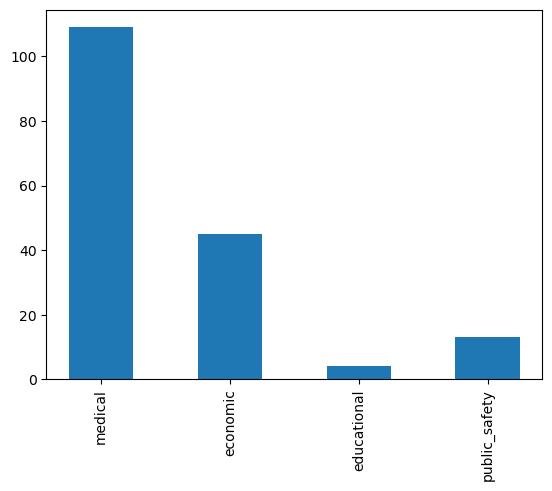

In [31]:
plt.bar(['medical','economic','educational','public_safety'],
[medical_facilities_count,economic_indicators_count,educational_resources_count,public_safety_count],
width=0.5, 
bottom=None, 
align='center')
plt.xticks(rotation='vertical')
plt.show()

In [17]:
TPE_model = HousePriceModel('TPE')

In [20]:
analysis_data, result = TPE_model.predictPrice(test_data)
analysis_data = analysis_data[0]

medical_facilities_indicators = analysis_data[26] + analysis_data[30] + analysis_data[33] + analysis_data[36]
economic_indicators_indicators = analysis_data[39] + analysis_data[42]
educational_resources_indicators = analysis_data[45] + analysis_data[48] + analysis_data[52] + analysis_data[56]
public_safety_indicators = analysis_data[60] - analysis_data[63] - analysis_data[66] + analysis_data[69]
natural_environment_indicators = analysis_data[72] + analysis_data[75] - analysis_data[78]
transportation_indicators = analysis_data[81] + analysis_data[84] + analysis_data[88] + test_data[92]
print(medical_facilities_indicators,
economic_indicators_indicators,
educational_resources_indicators,
public_safety_indicators,
natural_environment_indicators,
transportation_indicators)

[0.22751404]
1.8051211964147695 1.5542141643249783 0.16947646580913 -0.9518034172878977 -0.7330444387658142 2.973133550690985


2.027298604137706 1.0126027347543247 1.8295161090779117 1.353055405046926 2.118199966851514 2.068680100663382


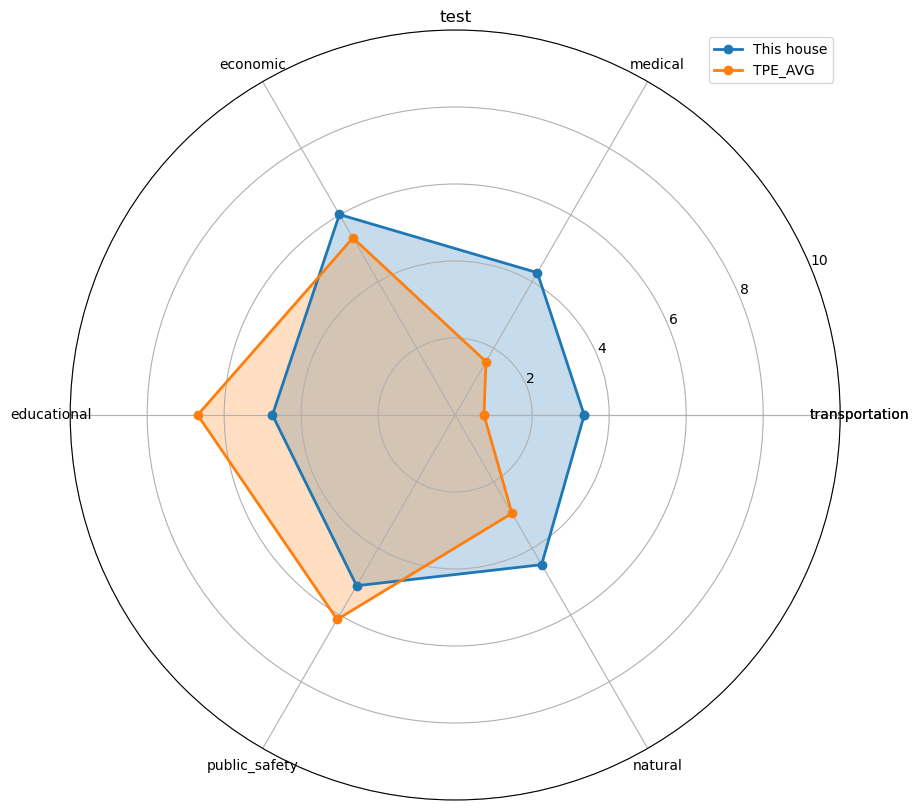

In [30]:
from cProfile import label


ind = pd.read_csv('./TPE/Min_max_data.csv')
s1 = (ind.iloc[0,2] - ind.iloc[0,1])/10
s2 = (ind.iloc[0,4] - ind.iloc[0,3])/10
s3 = (ind.iloc[0,6] - ind.iloc[0,5])/10
s4 = (ind.iloc[0,8] - ind.iloc[0,7])/10
s5 = (ind.iloc[0,10] - ind.iloc[0,9])/10
s6 = (ind.iloc[0,12] - ind.iloc[0,11])/10
print(s1,s2,s3,s4,s5,s6)

dis = pd.read_csv('./TPE/district_data.csv')

values = [(medical_facilities_indicators- ind.iloc[0,1]) / s1,
(economic_indicators_indicators- ind.iloc[0,3]) / s2,
(educational_resources_indicators - ind.iloc[0,5]) / s3,
(public_safety_indicators - ind.iloc[0,7]) / s4,
(natural_environment_indicators - ind.iloc[0,9]) / s5,
(transportation_indicators- ind.iloc[0,11]) / s6]

values2 = [(dis.iloc[5,2:8].tolist()[0]- ind.iloc[0,1]) / s1,
(dis.iloc[5,2:8].tolist()[1]- ind.iloc[0,3]) / s2,
(dis.iloc[5,2:8].tolist()[2] - ind.iloc[0,5]) / s3,
(dis.iloc[5,2:8].tolist()[3] - ind.iloc[0,7]) / s4,
(dis.iloc[5,2:8].tolist()[4] - ind.iloc[0,9]) / s5,
(dis.iloc[5,2:8].tolist()[5]- ind.iloc[0,11]) / s6]



features = ['','medical','economic','educational','public_safety','natural','transportation']
N = len(values)
angles=np.linspace(0, 2*np.pi, N, endpoint=False)

values=np.concatenate((values,[values[0]]))
values2=np.concatenate((values2,[values2[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 绘图
fig=plt.figure(figsize=(10,10))
# 这里一定要设置为极坐标格式
ax = fig.add_subplot(111, polar=True)
# 绘制折线图
ax.plot(angles, values, 'o-', linewidth=2, label='This house')
ax.plot(angles, values2, 'o-', linewidth=2, label='TPE_AVG')
# 填充颜色
ax.fill(angles, values, alpha=0.25)
ax.fill(angles, values2, alpha=0.25)
# 添加每个特征的标签
ax.set_thetagrids(angles * 180/np.pi, features) 
# 设置雷达图的范围
ax.set_ylim(0,10)
# 添加标题
plt.title('test')
# 设置图例
plt.legend(loc = 'best')
# 添加网格线
ax.grid(True)
# 显示图形
plt.show()